<a href="https://colab.research.google.com/github/ShovalBenjer/deep_learning_neural_networks/blob/main/Deep_exc_3_adir_shoval_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MNIST Dataset Preparation**

This notebook section preprocesses the MNIST dataset for training, validation, and testing. The workflow includes:
1. **Transformations**: Normalize pixel values to [-1, 1] using a predefined transformation pipeline.
2. **Dataset Loading**: Load the MNIST training and testing datasets.
3. **Data Splitting**: Split the training dataset into 90% training and 10% validation subsets.
4. **DataLoader Creation**: Set up batch processing for each subset.

Below are reusable functions with proper docstrings to accomplish each step.


In [1]:
import torch
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

def get_transforms():
    """
    Create and return a composition of transformations for preprocessing MNIST dataset.

    Returns:
        transform (transforms.Compose): Transformation pipeline for MNIST dataset.
    """
    return transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ])

def load_mnist_dataset(transform):
    """
    Load the MNIST dataset for training and testing.

    Args:
        transform (transforms.Compose): Transformation pipeline to apply to the dataset.

    Returns:
        train_dataset (Dataset): MNIST training dataset.
        test_dataset (Dataset): MNIST testing dataset.
    """
    train_dataset = datasets.MNIST(root="./data", train=True, transform=transform, download=True)
    test_dataset = datasets.MNIST(root="./data", train=False, transform=transform, download=True)
    return train_dataset, test_dataset

def split_train_validation(dataset, train_ratio=0.9):
    """
    Split the training dataset into training and validation subsets.

    Args:
        dataset (Dataset): The full training dataset.
        train_ratio (float): Proportion of the dataset to allocate for training.

    Returns:
        train_subset (Subset): Training subset of the dataset.
        val_subset (Subset): Validation subset of the dataset.
    """
    train_size = int(train_ratio * len(dataset))
    val_size = len(dataset) - train_size
    return random_split(dataset, [train_size, val_size])

def create_dataloaders(train_subset, val_subset, test_dataset, batch_size=50):
    """
    Create DataLoader objects for training, validation, and testing.

    Args:
        train_subset (Subset): Training subset of the dataset.
        val_subset (Subset): Validation subset of the dataset.
        test_dataset (Dataset): Test dataset.
        batch_size (int): Number of samples per batch.

    Returns:
        train_loader (DataLoader): DataLoader for the training subset.
        val_loader (DataLoader): DataLoader for the validation subset.
        test_loader (DataLoader): DataLoader for the test dataset.
    """
    train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_subset, batch_size=batch_size, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
    return train_loader, val_loader, test_loader

def main():
    """
    Main function to load and preprocess the MNIST dataset, split it into subsets, and create DataLoaders.
    """
    transform = get_transforms()
    train_dataset, test_dataset = load_mnist_dataset(transform)
    train_subset, val_subset = split_train_validation(train_dataset)
    train_loader, val_loader, test_loader = create_dataloaders(train_subset, val_subset, test_dataset)

    print(f"Training set size: {len(train_subset)}")
    print(f"Validation set size: {len(val_subset)}")
    print(f"Test set size: {len(test_dataset)}")

if __name__ == "__main__":
    main()


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 53.1MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 2.23MB/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 15.0MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 2.79MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Training set size: 54000
Validation set size: 6000
Test set size: 10000


# **Model Implementation**

In this section, we define the two required models for the MNIST classification task:

1. **Logistic Regression Model**:
   - A single-layer model with a softmax output for multi-class classification.
   - Simple architecture without hidden layers.

2. **Two-Layer Neural Network**:
   - Two fully connected hidden layers with ReLU activation.
   - Softmax output for multi-class classification.

Both models are defined using PyTorch's `nn.Module` for flexibility and ease of integration. The `initialize_models` function initializes and returns instances of both models.


In [2]:
# Ensure that PyTorch is installed
try:
    import torch
    import torch.nn as nn
    import torch.nn.functional as F
    from torch.utils.data import DataLoader
    import time
    print("PyTorch imported successfully.")
except ModuleNotFoundError as e:
    raise ModuleNotFoundError("PyTorch is not installed. Please install it using 'pip install torch'.") from e

class LogisticRegressionModel(nn.Module):
    """
    Defines a single-layer logistic regression model for MNIST classification.
    The model uses a softmax output layer for multi-class classification.
    """
    def __init__(self, input_size, num_classes):
        super(LogisticRegressionModel, self).__init__()
        print(f"Initializing LogisticRegressionModel with input_size={input_size}, num_classes={num_classes}")
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten the input tensor
        return F.log_softmax(self.linear(x), dim=1)

class TwoLayerNNModel(nn.Module):
    """
    Defines a two-layer fully connected neural network with ReLU activation for MNIST classification.
    The model uses a softmax output layer for multi-class classification.
    """
    def __init__(self, input_size, hidden_size, num_classes):
        super(TwoLayerNNModel, self).__init__()
        print(f"Initializing TwoLayerNNModel with input_size={input_size}, hidden_size={hidden_size}, num_classes={num_classes}")
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.output = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten the input tensor
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return F.log_softmax(self.output(x), dim=1)

def initialize_models():
    """
    Initialize and return both logistic regression and two-layer neural network models.

    Returns:
        logistic_model (LogisticRegressionModel): Logistic regression model instance.
        two_layer_nn (TwoLayerNNModel): Two-layer fully connected neural network instance.
    """
    input_size = 28 * 28  # MNIST images are 28x28 pixels
    num_classes = 10  # MNIST has 10 classes (digits 0-9)
    hidden_size = 200  # Number of neurons in hidden layers

    logistic_model = LogisticRegressionModel(input_size, num_classes)
    two_layer_nn = TwoLayerNNModel(input_size, hidden_size, num_classes)

    return logistic_model, two_layer_nn

def train_model(model, train_loader, criterion, optimizer, num_iterations):
    """
    Train a model using the specified DataLoader, loss criterion, and optimizer.

    Args:
        model (nn.Module): The model to train.
        train_loader (DataLoader): DataLoader for the training dataset.
        criterion (nn.Module): Loss function to compute training loss.
        optimizer (torch.optim.Optimizer): Optimizer for updating model weights.
        num_iterations (int): Number of iterations for training.

    Returns:
        None
    """
    model.train()
    start_time = time.time()

    for iteration, (images, labels) in enumerate(train_loader):
        if iteration >= num_iterations:
            break

        images = images.view(images.size(0), -1)  # Flatten images
        labels = labels.squeeze()  # Ensure labels are 1D

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (iteration + 1) % 100 == 0:
            print(f"Iteration [{iteration + 1}/{num_iterations}], Loss: {loss.item():.4f}")

    end_time = time.time()
    print(f"Training completed in {end_time - start_time:.2f} seconds.")

PyTorch imported successfully.


In [9]:
def train_model(model, train_loader, criterion, optimizer, num_iterations):
    """
    Train a model using the specified DataLoader, loss criterion, and optimizer.

    Args:
        model (nn.Module): The model to train.
        train_loader (DataLoader): DataLoader for the training dataset.
        criterion (nn.Module): Loss function to compute training loss.
        optimizer (torch.optim.Optimizer): Optimizer for updating model weights.
        num_iterations (int): Number of iterations for training.

    Returns:
        None
    """
    model.train()
    start_time = time.time()

    iteration = 0
    epoch = 0
    while iteration < num_iterations:
        print(f"Starting epoch {epoch + 1}...")
        for images, labels in train_loader:
            if iteration >= num_iterations:
                break

            images = images.view(images.size(0), -1)  # Flatten images
            labels = labels.squeeze()  # Ensure labels are 1D

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            if (iteration + 1) % 100 == 0:
                print(f"Iteration [{iteration + 1}/{num_iterations}], Loss: {loss.item():.4f}")

            iteration += 1
        epoch += 1

    end_time = time.time()
    print(f"Training completed in {end_time - start_time:.2f} seconds.")


def count_model_parameters(model):
    """
    Count the number of trainable parameters (weights and biases) in a model.

    Args:
        model (nn.Module): The model whose parameters are to be counted.

    Returns:
        int: Total number of trainable parameters.
    """
    return sum(p.numel() for p in model.parameters() if p.requires_grad)


def main():
    """
    Main function to train and log the behavior of both models using real MNIST data.
    """
    # Prepare MNIST data
    transform = get_transforms()
    train_dataset, test_dataset = load_mnist_dataset(transform)
    train_subset, val_subset = split_train_validation(train_dataset)
    train_loader, val_loader, test_loader = create_dataloaders(train_subset, val_subset, test_dataset)

    # Initialize models
    logistic_model, two_layer_nn = initialize_models()

    # Define hyperparameters
    batch_size = 50
    num_iterations = 13000
    learning_rate = 0.001

    # Log number of parameters for each model
    print(f"Logistic Regression Model Parameters: {count_model_parameters(logistic_model)}")
    print(f"Two-Layer Neural Network Parameters: {count_model_parameters(two_layer_nn)}")

    # Loss and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer_logistic = torch.optim.Adam(logistic_model.parameters(), lr=learning_rate)
    optimizer_nn = torch.optim.Adam(two_layer_nn.parameters(), lr=learning_rate)

    print("\nTraining Logistic Regression Model...")
    train_model(logistic_model, train_loader, criterion, optimizer_logistic, num_iterations)

    print("\nTraining Two-Layer Neural Network Model...")
    train_model(two_layer_nn, train_loader, criterion, optimizer_nn, num_iterations)


if __name__ == "__main__":
    main()


Initializing LogisticRegressionModel with input_size=784, num_classes=10
Initializing TwoLayerNNModel with input_size=784, hidden_size=200, num_classes=10
Logistic Regression Model Parameters: 7850
Two-Layer Neural Network Parameters: 199210

Training Logistic Regression Model...
Starting epoch 1...
Iteration [100/13000], Loss: 0.6988
Iteration [200/13000], Loss: 0.6723
Iteration [300/13000], Loss: 0.4412
Iteration [400/13000], Loss: 0.4509
Iteration [500/13000], Loss: 0.5354
Iteration [600/13000], Loss: 0.5464
Iteration [700/13000], Loss: 0.6807
Iteration [800/13000], Loss: 0.3368
Iteration [900/13000], Loss: 0.5056
Iteration [1000/13000], Loss: 0.2349
Starting epoch 2...
Iteration [1100/13000], Loss: 0.1865
Iteration [1200/13000], Loss: 0.5097
Iteration [1300/13000], Loss: 0.1436
Iteration [1400/13000], Loss: 0.1748
Iteration [1500/13000], Loss: 0.1865
Iteration [1600/13000], Loss: 0.5025
Iteration [1700/13000], Loss: 0.6144
Iteration [1800/13000], Loss: 0.1818
Iteration [1900/13000]

# **Evaluation Metrics and Analysis**

In this section, we evaluate the trained models using the following steps:

1. **Prediction Function**:
   - Takes a trained model and a DataLoader as input.
   - Returns predictions and ground truth labels.

2. **Evaluation Function**:
   - Computes metrics: Accuracy, Precision, Recall, F1 Score, and Confusion Matrix.
   - Designed to work with multiclass classification tasks.

3. **Visualization**:
   - Displays a confusion matrix for a better understanding of class-wise predictions.

### Workflow
1. Predict using the trained Logistic Regression and Two-Layer Neural Network models.
2. Evaluate their performance on the dataset.
3. Visualize and log results for detailed analysis.


Initializing LogisticRegressionModel with input_size=784, num_classes=10
Initializing TwoLayerNNModel with input_size=784, hidden_size=200, num_classes=10
Evaluating Logistic Regression Model on Validation Set...
Logistic Regression Validation Metrics: {'accuracy': 0.10216666666666667, 'precision': 0.07591451717742848, 'recall': 0.10216666666666667, 'f1_score': 0.04784209964127285, 'confusion_matrix': array([[  1,  15,   0,   4, 540,  11,   0,   1,   0,   0],
       [  0,  17,   0,   0, 677,   3,   0,   0,   0,   0],
       [  1,  33,   0,   5, 512,  26,   0,   8,   6,   1],
       [  0,  27,   0,   2, 557,  15,   0,  11,   8,   0],
       [ 22,  14,   0,   4, 483,  37,   0,   4,  27,   0],
       [  0,   5,   0,   4, 453,  48,   0,  24,   7,   1],
       [  1,   6,   0,   1, 544,  22,   0,   0,   4,   0],
       [  0,  58,   0,  10, 465,  96,   0,  56,   1,   0],
       [  8,  15,   0,  17, 335, 106,   0,  56,   6,   0],
       [ 17,  26,   0,  11, 455,  24,   0,  34,  12,   0]])}


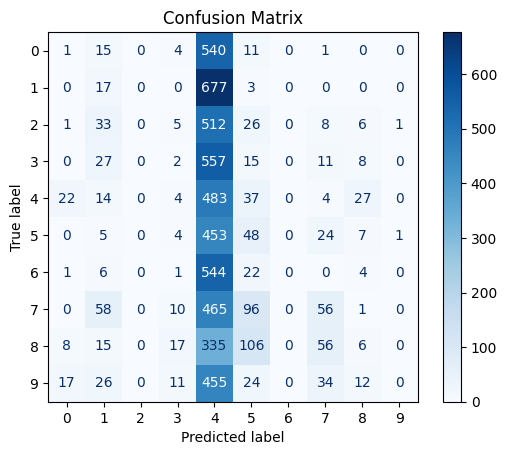


Evaluating Two-Layer Neural Network Model on Validation Set...
Two-Layer Neural Network Validation Metrics: {'accuracy': 0.079, 'precision': 0.03756604246967703, 'recall': 0.079, 'f1_score': 0.028959807597493916, 'confusion_matrix': array([[  4,   0,   2,   0,   0,  71,  24,   0, 316, 155],
       [ 14,   0,   0,   0,   0,  13,   3,   0, 665,   2],
       [ 12,   0,   0,   0,   0, 186,   1,   0, 376,  17],
       [ 51,   0,   0,   0,   0,  63,   3,   0, 495,   8],
       [  9,   0,   0,   0,   0, 132,   8,   0, 438,   4],
       [ 23,   0,   0,   0,   0,  65,  24,   0, 385,  45],
       [  4,   0,   0,   0,   0, 291,  20,   0, 241,  22],
       [  5,   0,   0,   0,   0,  47,   1,   0, 624,   9],
       [ 12,   0,   0,   0,   0, 121,   8,   0, 381,  21],
       [  6,   0,   0,   0,   0,  49,   4,   0, 516,   4]])}


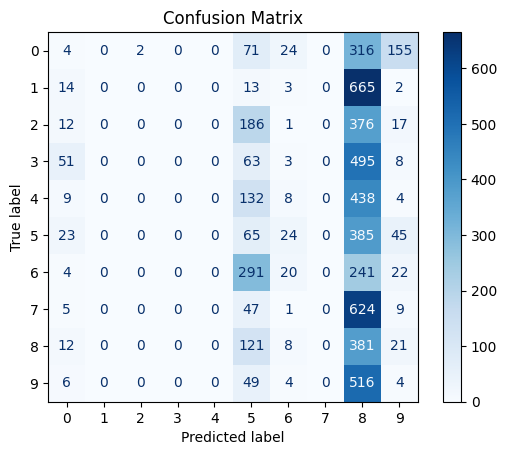

In [10]:
import torch
import torch.nn as nn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt


def predict(model, data_loader):
    """
    Generate predictions and collect true labels from a given DataLoader using a trained model.

    Args:
        model (nn.Module): Trained model to perform inference.
        data_loader (DataLoader): DataLoader containing the dataset for prediction.

    Returns:
        np.ndarray: Predicted class indices.
        np.ndarray: Ground truth class labels.
    """
    model.eval()
    predictions, true_labels = [], []

    with torch.no_grad():
        for images, labels in data_loader:
            images = images.view(images.size(0), -1)  # Flatten input
            outputs = model(images)
            predicted = torch.argmax(outputs, dim=1)
            predictions.extend(predicted.cpu().numpy())
            true_labels.extend(labels.cpu().numpy())

    return np.array(predictions), np.array(true_labels)


def evaluate_metrics(true_labels, predictions):
    """
    Evaluate the model's performance using various metrics.

    Args:
        true_labels (np.ndarray): Ground truth labels.
        predictions (np.ndarray): Predicted class indices.

    Returns:
        dict: Metrics including accuracy, precision, recall, F1 score, and the confusion matrix.
    """
    metrics = {
        "accuracy": accuracy_score(true_labels, predictions),
        "precision": precision_score(true_labels, predictions, average="weighted", zero_division=0),
        "recall": recall_score(true_labels, predictions, average="weighted"),
        "f1_score": f1_score(true_labels, predictions, average="weighted"),
        "confusion_matrix": confusion_matrix(true_labels, predictions),
    }
    return metrics


def display_confusion_matrix(cm, class_names):
    """
    Display a confusion matrix using Matplotlib.

    Args:
        cm (np.ndarray): Confusion matrix.
        class_names (list): List of class names corresponding to matrix indices.

    Returns:
        None
    """
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    disp.plot(cmap="Blues")
    plt.title("Confusion Matrix")
    plt.show()


def main():
    """
    Main function to evaluate the trained models and display metrics using real MNIST validation data.
    """
    # Prepare MNIST data
    transform = get_transforms()
    train_dataset, test_dataset = load_mnist_dataset(transform)
    train_subset, val_subset = split_train_validation(train_dataset)
    train_loader, val_loader, test_loader = create_dataloaders(train_subset, val_subset, test_dataset)

    # Initialize models
    logistic_model, two_layer_nn = initialize_models()

    # Evaluate Logistic Regression Model
    print("Evaluating Logistic Regression Model on Validation Set...")
    predictions, true_labels = predict(logistic_model, val_loader)
    metrics = evaluate_metrics(true_labels, predictions)
    print("Logistic Regression Validation Metrics:", metrics)
    display_confusion_matrix(metrics["confusion_matrix"], class_names=list(range(10)))

    # Evaluate Two-Layer Neural Network
    print("\nEvaluating Two-Layer Neural Network Model on Validation Set...")
    predictions, true_labels = predict(two_layer_nn, val_loader)
    metrics = evaluate_metrics(true_labels, predictions)
    print("Two-Layer Neural Network Validation Metrics:", metrics)
    display_confusion_matrix(metrics["confusion_matrix"], class_names=list(range(10)))


if __name__ == "__main__":
    main()
